In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
working_dir = os.getcwd()

train_data = pd.read_csv(f'{working_dir}/../data/TrainData.csv')
X = train_data['WS10'].values.reshape(-1, 1)  # Wind speed at 10m above ground level
y = train_data['POWER'].values               # Normalized power values

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
svr_model = SVR(kernel='rbf', C=1, gamma='scale')
svr_model.fit(X_train, y_train)

SVR(C=1)

In [5]:
y_pred = svr_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE for SVR: {rmse}")

RMSE for SVR: 0.22372413703811606


In [6]:
weather_data = pd.read_csv(f'{working_dir}/../data/WeatherForecastInput.csv')
X_forecast = weather_data['WS10'].values.reshape(-1, 1)
y_forecast = svr_model.predict(X_forecast)

In [7]:
forecast_template = pd.read_csv(f'{working_dir}/../data/ForecastTemplate.csv')
forecast_template['FORECAST'] = y_forecast
forecast_template.to_csv(f'{working_dir}/results/ForecastTemplate1-SVR.csv', index=False)

In [ ]:
# Read the solution file
solution_data = pd.read_csv(f'{working_dir}/../data/Solution.csv')

# Extract the true wind power values
y_true = solution_data['POWER']

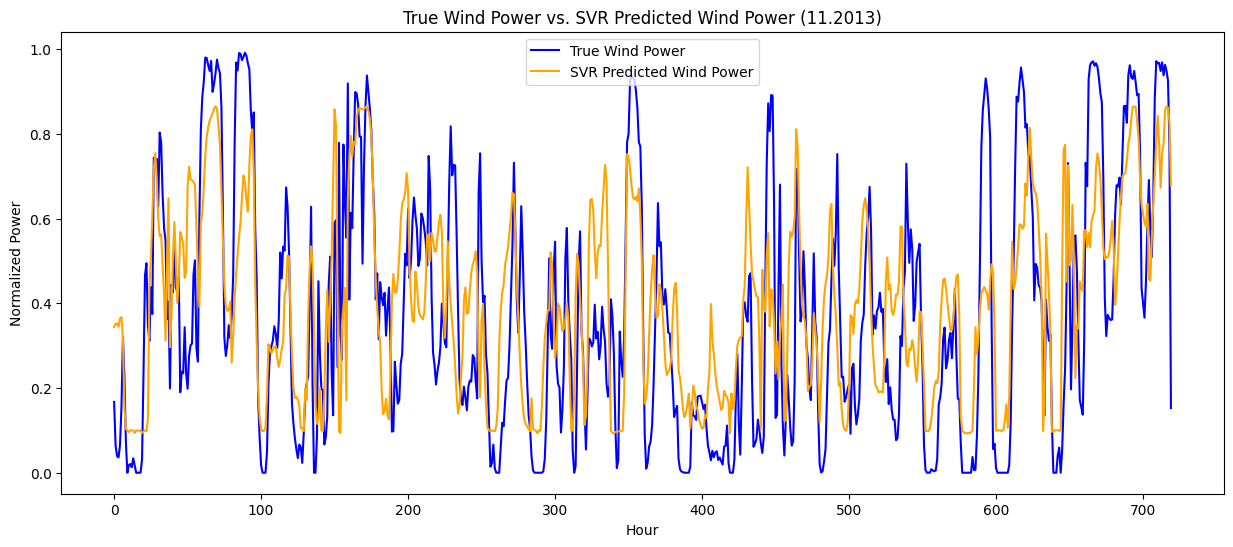

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='True Wind Power', color='blue')
plt.plot(y_forecast, label='SVR Predicted Wind Power', color='orange')
plt.legend()
plt.title('True Wind Power vs. SVR Predicted Wind Power (11.2013)')
plt.xlabel('Hour')
plt.ylabel('Normalized Power')
plt.show()

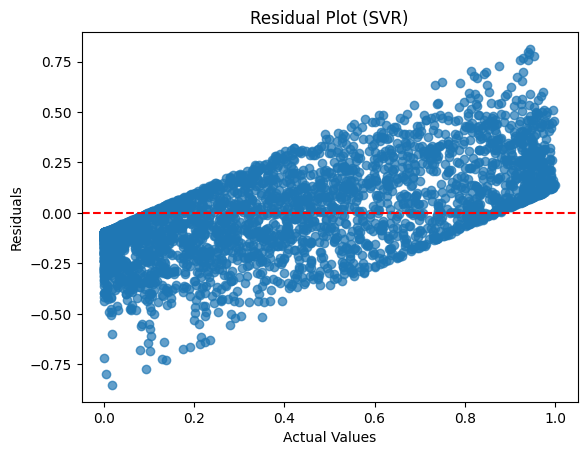

In [10]:
svr_residuals = y_val - y_pred

plt.scatter(y_val, svr_residuals, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (SVR)")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()